**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
df = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

#### Look at the dataset.

In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
df.shape

(310, 7)

In [6]:
df.describe(include='all')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


#### Get the datatype information about the dataset 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


#### Find the missing value

In [8]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

 #### Look at the unique values of class values

In [9]:
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [10]:
for col in df.columns:
    if(np.object == df[col].dtype):
        print(df[col].value_counts())

Abnormal    210
Normal      100
Name: class, dtype: int64


#### Look at the distribution of class values

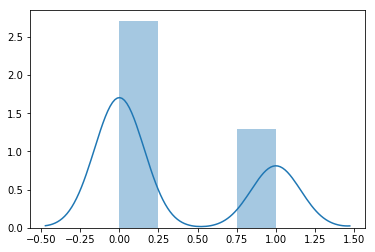

In [11]:
sns.distplot(df['class'].astype('category').cat.codes)

#### Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

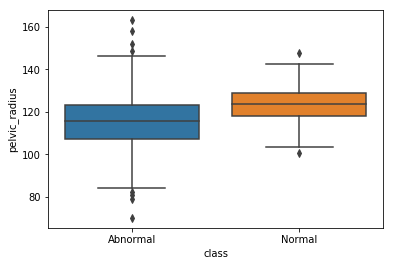

In [12]:
sns.boxplot(data=df, x='class', y='pelvic_radius')

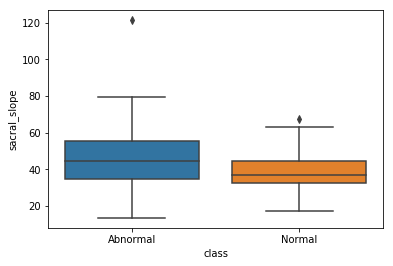

In [13]:
sns.boxplot(data=df, x='class', y='sacral_slope')

# Encode the Class variable to integer.

In [14]:
# Had used panda's .cat.codes. 
df['class'] = df['class'].astype('category').cat.codes

#### above method had coded string 'abnormal' as 0 and 'normal' as 1 

In [15]:
df['class'].value_counts()

0    210
1    100
Name: class, dtype: int64

#### understand correlation between features

In [16]:
df.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687
class,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000


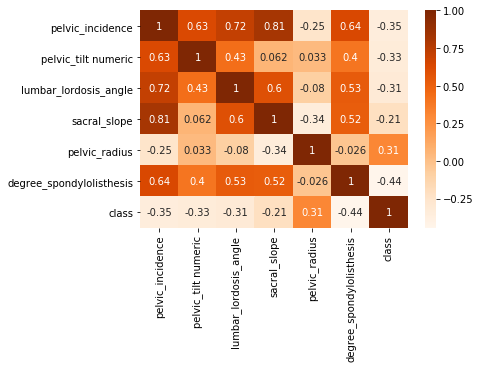

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='Oranges')

#### Look at the distribution of class values and other attributes

C:\Users\Barani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Barani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


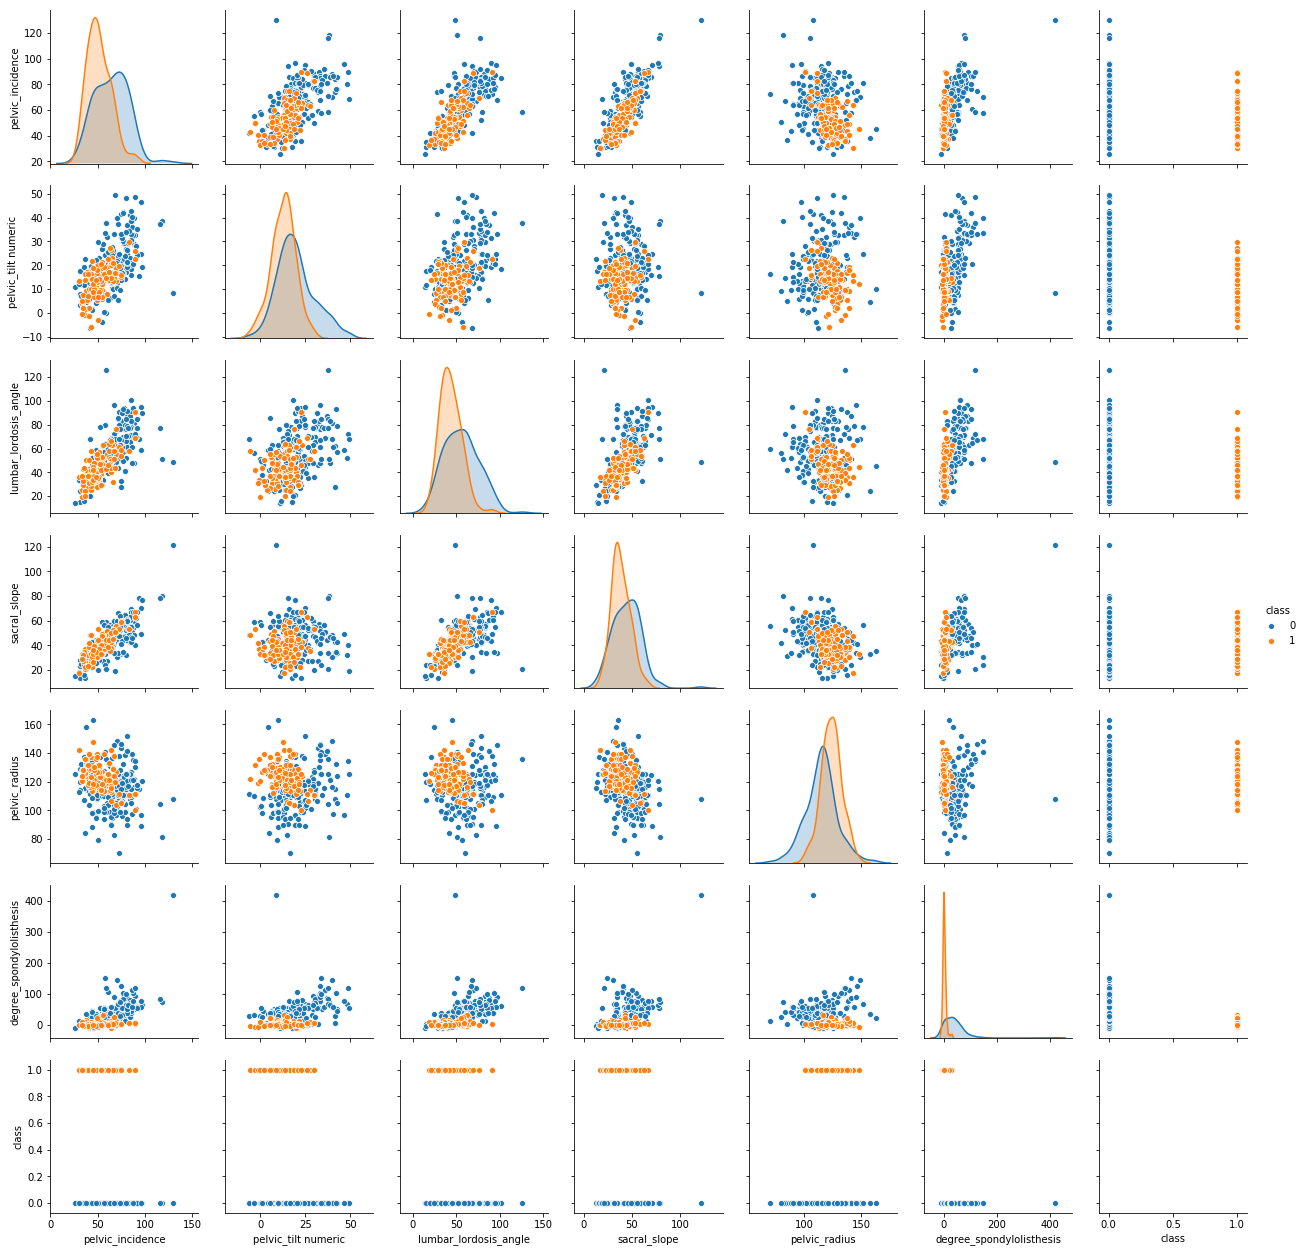

In [18]:
sns.pairplot(data=df,hue='class')
plt.show()

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [19]:
X_feat = df.drop(columns='class')

In [20]:
y_target = df['class'].copy()

In [21]:
X_feat.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [22]:
y_target.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int8

# Normalize your Data (X) to get values between 0 to 1.

In [23]:
X_feat_norm = X_feat.apply(zscore)

In [24]:
X_feat_norm.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-2.141656e-16,1.568638e-16,3.527644e-16,-1.719055e-16,4.548333e-16,9.060852e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


In [25]:
y_target.shape

(310,)

In [26]:
X_feat.shape

(310, 6)

# Split the dat as train and test with a ratio of 70:30.

In [27]:
X_feat_train, X_feat_test, y_target_train, y_target_test = train_test_split(X_feat_norm, y_target,test_size=0.30, random_state=9)

In [28]:
print('Train dataset\'s shape X_train{} y_train{}'.format(X_feat_train.shape, y_target_train.shape))
print('Test dataset\'s shape X_test{} y_test{}'.format(X_feat_test.shape, y_target_test.shape))

Train dataset's shape X_train(217, 6) y_train(217,)
Test dataset's shape X_test(93, 6) y_test(93,)


In [29]:
y_target_test.value_counts()

0    72
1    21
Name: class, dtype: int64

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [30]:
# Create an object
KNN = KNeighborsClassifier(n_neighbors=3)

In [31]:
# Train the model using the known samples(input and output)
KNN.fit(X_feat_train, y_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [32]:
y_target_predict = KNN.predict(X_feat_test)

In [33]:
metrics.confusion_matrix(y_target_test, y_target_predict)

array([[61, 11],
       [ 5, 16]], dtype=int64)

### Inference from confusion matrix:

Model has predicted the labels for the test data as follows

Abnormal label: correctly for 61 entities, incorrectly for 11 entities (i.e. here, incorrectly 11 entities are predicted as normal class)

Normal label: correctly for 16 entities, incorrectly for 5 entities


In [34]:
metrics.accuracy_score(y_target_test, y_target_predict)

0.8279569892473119

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [35]:
# Assess the model performance
KNN.score(X_feat_test, y_target_test)

0.8279569892473119

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [36]:
# To understand the best k value, get the k limits by sqrt(sample size)
k_limit = int(np.sqrt(df.shape[0]))
k = np.arange(1, k_limit+1, 2)

test_score=[]

for i in range (1, k_limit+1, 2):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_feat_train, y_target_train)
    test_score.append(KNN.score(X_feat_test, y_target_test))
      

In [37]:
for i in range (0, k.shape[0] ):
    print('for K=%d \t test_accuracy_score [%f]'%(k[i],test_score[i]))

for K=1 	 test_accuracy_score [0.806452]
for K=3 	 test_accuracy_score [0.827957]
for K=5 	 test_accuracy_score [0.784946]
for K=7 	 test_accuracy_score [0.795699]
for K=9 	 test_accuracy_score [0.774194]
for K=11 	 test_accuracy_score [0.827957]
for K=13 	 test_accuracy_score [0.795699]
for K=15 	 test_accuracy_score [0.817204]
for K=17 	 test_accuracy_score [0.817204]


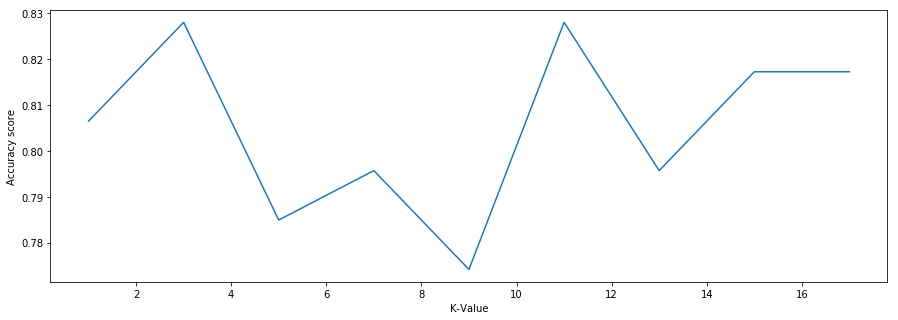

In [38]:
plt.figure(figsize=(15,5))
plt.plot(k,test_score)
plt.xlabel('K-Value')
plt.ylabel('Accuracy score')
plt.show()

In [39]:
test_score_df = pd.DataFrame([k,test_score])
test_score_df = test_score_df.T
test_score_df.columns=['k-val','Accuracy score']
test_score_df

,k-val,Accuracy score
0,1.0,0.806452
1,3.0,0.827957
2,5.0,0.784946
3,7.0,0.795699
4,9.0,0.774194
5,11.0,0.827957
6,13.0,0.795699
7,15.0,0.817204
8,17.0,0.817204


In [40]:
test_score_df.loc[(test_score_df['Accuracy score'] == max(test_score_df['Accuracy score'])),:]

,k-val,Accuracy score
1,3.0,0.827957
5,11.0,0.827957


### Inference:
    For the above task(two class classification problem), the best score is 82% and it's occurs for K-values = 3 & 11

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [41]:
df_3c = pd.read_csv('3Classdata.csv')

In [42]:
df_3c.sample(n=5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
100,84.585607,30.361685,65.479486,54.223922,108.010219,25.118478,Spondylolisthesis
261,74.976021,14.921705,53.730072,60.054317,105.645400,1.594748,Normal
74,72.222334,23.077711,91.000000,49.144624,137.736655,56.804093,Spondylolisthesis
191,86.472905,40.303766,61.141012,46.169139,97.404189,55.752221,Spondylolisthesis


In [43]:
df_3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [44]:
df_3c.describe(include='all')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


### Check for missing values

In [45]:
df_3c.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

 #### Look at the unique values of class values

In [46]:
df_3c['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [47]:
df_3c['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

### Convert categorical into numeric

In [48]:
le = preprocessing.LabelEncoder()

In [49]:
le.fit(df_3c['class'].value_counts().index)


LabelEncoder()

In [50]:
le.classes_

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

In [51]:
 df_3c['class'] = le.transform(df_3c['class'])

In [52]:
df_3c['class'].value_counts()

2    150
1    100
0     60
Name: class, dtype: int64

In [53]:
df_3c.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.590025
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.205158
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.636490
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.604681
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.133424
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.588541
class,0.590025,0.205158,0.636490,0.604681,-0.133424,0.588541,1.000000


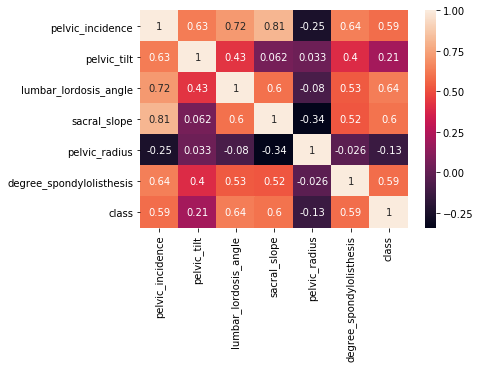

In [54]:
sns.heatmap(df_3c.corr(),annot=True)
plt.show()

C:\Users\Barani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Barani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


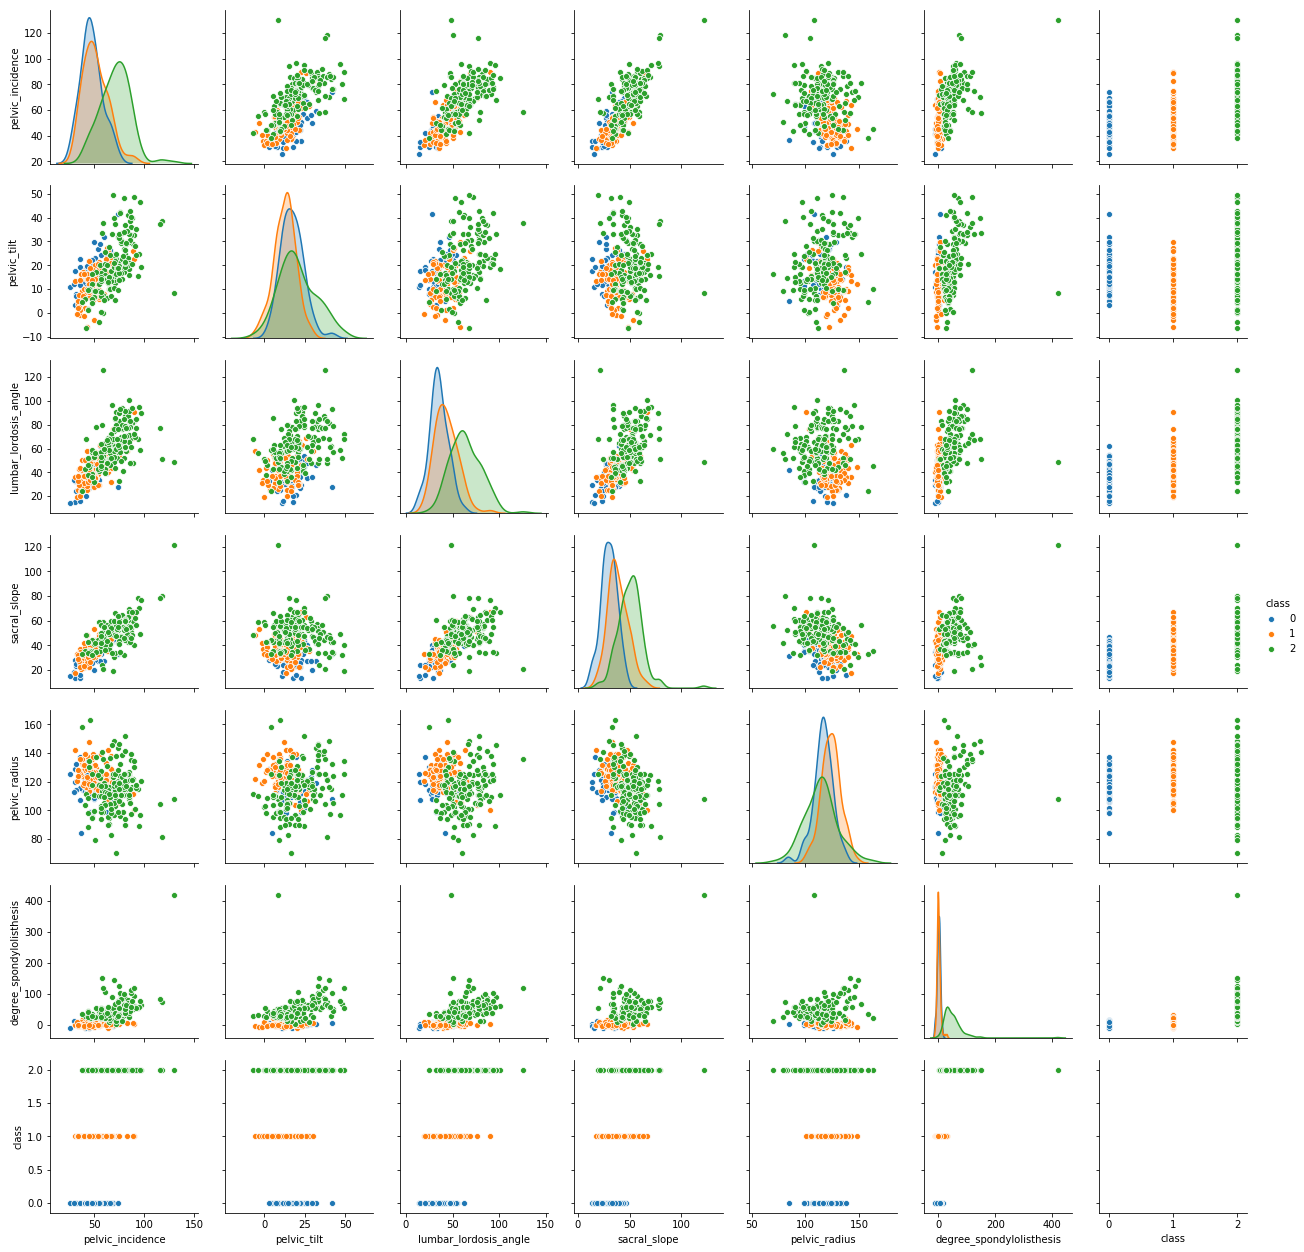

In [55]:
sns.pairplot(data=df_3c,hue='class')
plt.show()

In [56]:
X_feat_3c_df = df_3c.drop(axis=0,columns='class')

In [57]:
X_feat_3c_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [58]:
y_target_3c_ser = df_3c['class'].copy()

In [59]:
y_target_3c_ser.sample(n=5)

17     0
16     0
223    1
204    2
33     0
Name: class, dtype: int32

# Normalize your Data (X)

In [60]:
X_feat_norm_3c_df = X_feat_3c_df.apply(zscore)

In [61]:
X_feat_norm_3c_df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-2.141656e-16,1.568638e-16,3.527644e-16,-1.719055e-16,4.548333e-16,9.060852e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


# Split the data as train and test with a ratio of 70:30.

In [62]:
X_feat_train_3c, X_feat_test_3c, y_target_train_3c, y_target_test_3c = train_test_split(X_feat_norm_3c_df,y_target_3c_ser,test_size=0.30,random_state=7)

In [63]:
print('Train dataset\'s shape X_train{} y_train{}'.format(X_feat_train_3c.shape, y_target_train_3c.shape))
print('Test dataset\'s shape X_test{} y_test{}'.format(X_feat_test_3c.shape, y_target_test_3c.shape))

Train dataset's shape X_train(217, 6) y_train(217,)
Test dataset's shape X_test(93, 6) y_test(93,)


In [64]:
print('dataset\'s shape before split X_Feature{} y_target{}'.format(X_feat_3c_df.shape,y_target_3c_ser.shape))

dataset's shape before split X_Feature(310, 6) y_target(310,)


In [65]:
y_target_test_3c.value_counts()

2    48
1    34
0    11
Name: class, dtype: int64

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [66]:
KNN_3c = KNeighborsClassifier(n_neighbors=3)


In [67]:
KNN_3c.fit(X_feat_train_3c, y_target_train_3c)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [68]:
y_label_predicted_3c =  KNN_3c.predict(X_feat_test_3c)

In [69]:
metrics.accuracy_score(y_target_test_3c,y_label_predicted_3c)

0.7419354838709677

In [70]:
metrics.confusion_matrix(y_target_test_3c,y_label_predicted_3c)

array([[ 7,  3,  1],
       [11, 20,  3],
       [ 4,  2, 42]], dtype=int64)

### Inference from confusion matrix

Model has predicited 

    Hernia label: 
        correctly for 7 entities, incorectly for 4 entities(here, 3 are predicted as Normal class, 1 as Spondylolisthesis)   
    
     Normal label: 
         correclty for 20 entites (here, 11 are predicted as Hernia class, 3 are predicted as Spondylolisthesis)

    Spondylolisthesis: 
        correctly for 42 entities (here, 4 are predicted as Hernia class, 3 are predicted as Normal)         
    


# Calculate the performance score of your classification on test dataset.

In [71]:
KNN_3c.score(X_feat_test_3c, y_target_test_3c)

0.7419354838709677

# What is the best K value for your classifcation?

In [72]:
k_limit_3c = int(np.sqrt(df_3c.shape[0]))
k_val_3c = np.arange(1, k_limit+1, 2)
test_score_3c=[]

for i in range (1, k_limit_3c+1, 2):
    KNN_3c = KNeighborsClassifier(n_neighbors=i,p=2)
    KNN_3c.fit(X_feat_train_3c, y_target_train_3c)
    test_score_3c.append( KNN_3c.score(X_feat_test_3c, y_target_test_3c))


In [73]:
for i in range (0, k.shape[0] ):
    print('for K=%d \t test_accuracy_score [%f]'%(k_val_3c[i],test_score_3c[i]))

for K=1 	 test_accuracy_score [0.795699]
for K=3 	 test_accuracy_score [0.741935]
for K=5 	 test_accuracy_score [0.752688]
for K=7 	 test_accuracy_score [0.774194]
for K=9 	 test_accuracy_score [0.774194]
for K=11 	 test_accuracy_score [0.806452]
for K=13 	 test_accuracy_score [0.827957]
for K=15 	 test_accuracy_score [0.827957]
for K=17 	 test_accuracy_score [0.795699]


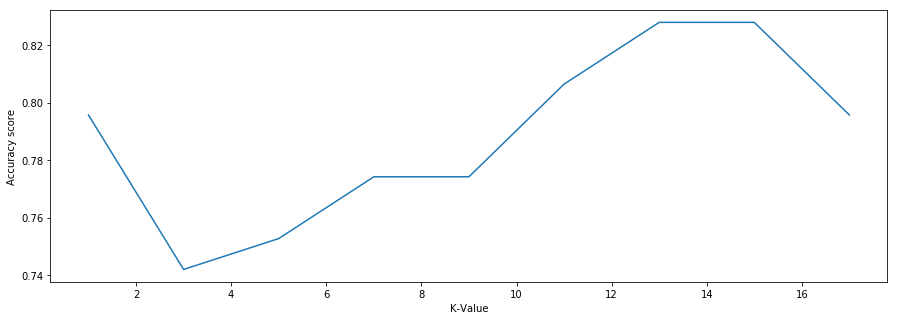

In [74]:
plt.figure(figsize=(15,5))
plt.plot(k_val_3c,test_score_3c)
plt.xlabel('K-Value')
plt.ylabel('Accuracy score')
plt.show()

In [75]:
test_score_3c_df = pd.DataFrame([k_val_3c,test_score_3c])
test_score_3c_df = test_score_3c_df.T
test_score_3c_df.columns=['k-val','Accuracy score']
test_score_3c_df

,k-val,Accuracy score
0,1.0,0.795699
1,3.0,0.741935
2,5.0,0.752688
3,7.0,0.774194
4,9.0,0.774194
5,11.0,0.806452
6,13.0,0.827957
7,15.0,0.827957
8,17.0,0.795699


In [76]:
test_score_3c_df.loc[(test_score_3c_df['Accuracy score'] == max(test_score_3c_df['Accuracy score'])),:]

,k-val,Accuracy score
6,13.0,0.827957
7,15.0,0.827957


### Inference:
    For the above task(three class classification problem), the best score is 82% and it's occurs for K-values = 13 & 15

## Accuracy score improvement

As the model's accuracy score for 3 class classfication problem with k=3 was only 74%, trying to understanding how accuracy improves when we drop a feature that doesn't have good correlation with other features

In [77]:
x_3c_opt_col =df_3c.drop(axis=0,columns=['class','pelvic_radius'])

In [78]:
x_3c_opt_col.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,-0.254400
1,39.056951,10.060991,25.015378,28.995960,4.564259
2,68.832021,22.218482,50.092194,46.613539,-3.530317
3,69.297008,24.652878,44.311238,44.644130,11.211523
4,49.712859,9.652075,28.317406,40.060784,7.918501


In [79]:
y_3c_ser =  df_3c['class'].copy()

In [80]:
x_3c_norm_df = x_3c_opt_col.apply(zscore)

In [81]:
x_3c_norm_df.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,0.523557
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,1.000000


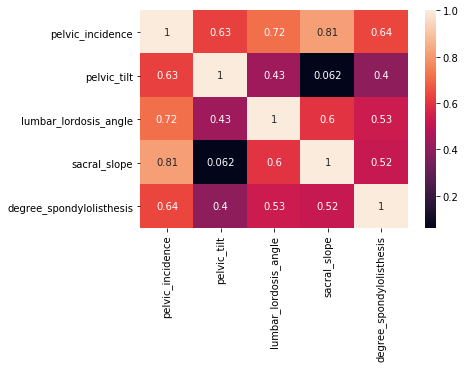

In [82]:
sns.heatmap(x_3c_norm_df.corr(), annot=True)
plt.show()

In [83]:
x_3c_train, x_3c_test, y_3c_train, y_3c_test = train_test_split(x_3c_norm_df,y_3c_ser,test_size=0.30,random_state=7)

In [84]:
Knn_3c = KNeighborsClassifier(n_neighbors=3)
Knn_3c.fit(x_3c_train, y_3c_train)
print(Knn_3c.score(x_3c_test, y_3c_test))

0.7956989247311828


### Inference:
    From the 3 class classification probelm's correlation matrix and heatmap(refer In[53], In[54]) could observe that
    feature 'pelvic radius' has weak correlation with other features. Hence, when we dropped it and further build the
    model could see that for k=3 the accuracy score has increased from 74% to 79% 

### EOF